In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as ss
import pingouin as pg

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch

In [3]:
beer = pd.read_csv(Path.cwd() / 'data' / 'beerbrand.csv', index_col='name')
beer.head()

,calories,sodium,alcohol,cost
name,,,,
BUDWEISER,144,15,4.7,0.43
SCHLITZ,151,19,4.9,0.43
LOWENBRAU,157,15,4.9,0.48
KRONENBOURG,170,7,5.2,0.73
HEINEKEN,152,11,5.0,0.77


In [4]:
beer.describe()

,calories,sodium,alcohol,cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.400000,14.950000,4.440000,0.496500
std,30.257491,6.581273,0.759778,0.143757
min,68.000000,6.000000,2.300000,0.280000
25%,110.250000,9.500000,4.200000,0.430000
50%,144.000000,15.000000,4.650000,0.440000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


In [5]:
scaler = StandardScaler()
zbeer = scaler.fit_transform(beer)
zbeer

array([[ 0.39333561,  0.00779468,  0.35109498, -0.47460365],
       [ 0.63069331,  0.63136906,  0.62116805, -0.47460365],
       [ 0.83414276,  0.00779468,  0.62116805, -0.1177588 ],
       [ 1.27494991, -1.23935408,  1.02627765,  1.66646546],
       [ 0.66460155, -0.6157797 ,  0.75620458,  1.95194134],
       [ 0.42724385,  1.25494344,  0.21605845, -1.54513821],
       [ 1.44449112,  1.41083704,  1.43138724, -0.68871056],
       [ 0.56287682,  1.87851782,  0.35109498, -0.54597262],
       [-1.13253529, -0.7716733 , -0.18905115, -0.47460365],
       [-0.6578199 , -1.08346049, -0.99927034, -0.40323468],
       [ 0.25770264,  0.47547547,  0.21605845, -0.40323468],
       [-1.03081057,  0.00779468, -0.45912421, -0.26049674],
       [ 0.08816143, -0.6157797 , -0.32408768,  0.02497914],
       [ 0.59678506,  0.63136906,  0.35109498,  1.88057237],
       [ 0.56287682, -1.39524768,  0.75620458,  2.09467928],
       [-2.1836908 ,  0.00779468, -2.88978179, -0.83144851],
       [ 0.12206967,  0.

In [6]:
slink = sch.linkage(zbeer, method='single')
slink

array([[10.        , 16.        ,  0.34746526,  2.        ],
       [ 0.        , 20.        ,  0.51034304,  3.        ],
       [ 8.        , 19.        ,  0.56837992,  2.        ],
       [ 7.        , 17.        ,  0.57052829,  2.        ],
       [ 1.        , 21.        ,  0.57674272,  4.        ],
       [ 2.        , 24.        ,  0.62816292,  5.        ],
       [ 4.        , 14.        ,  0.79893202,  2.        ],
       [23.        , 25.        ,  0.81480611,  7.        ],
       [11.        , 22.        ,  0.85831199,  3.        ],
       [ 3.        , 26.        ,  0.88750067,  3.        ],
       [ 9.        , 28.        ,  0.90573564,  4.        ],
       [12.        , 27.        ,  1.08969302,  8.        ],
       [ 5.        , 31.        ,  1.15568621,  9.        ],
       [30.        , 32.        ,  1.18930743, 13.        ],
       [13.        , 29.        ,  1.31498533,  4.        ],
       [ 6.        , 33.        ,  1.34433062, 14.        ],
       [15.        , 18.

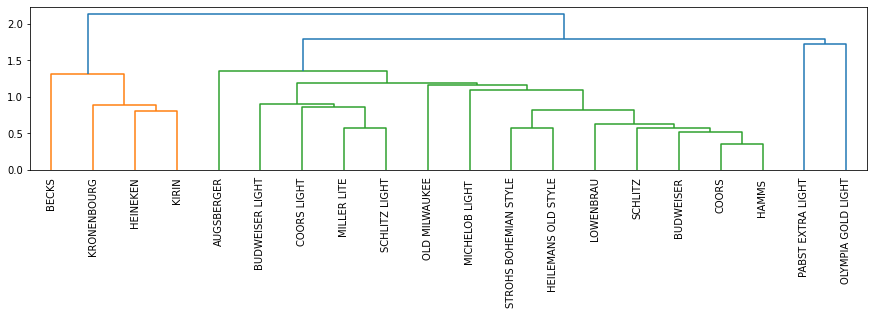

In [7]:
plt.figure(figsize=(15, 3))
sch.dendrogram(slink, leaf_font_size=10, leaf_rotation=90, labels=beer.index)
plt.show()

In [8]:
wlink = sch.linkage(zbeer, method='ward')
wlink

array([[10.        , 16.        ,  0.34746526,  2.        ],
       [ 8.        , 19.        ,  0.56837992,  2.        ],
       [ 7.        , 17.        ,  0.57052829,  2.        ],
       [ 0.        ,  2.        ,  0.62816292,  2.        ],
       [ 1.        , 23.        ,  0.7652467 ,  3.        ],
       [ 4.        , 14.        ,  0.79893202,  2.        ],
       [ 3.        , 25.        ,  0.96066551,  3.        ],
       [ 9.        , 21.        ,  1.04656384,  3.        ],
       [20.        , 24.        ,  1.10428769,  5.        ],
       [11.        , 27.        ,  1.28005237,  4.        ],
       [ 5.        , 22.        ,  1.31571714,  3.        ],
       [12.        , 29.        ,  1.48375985,  5.        ],
       [15.        , 18.        ,  1.72318462,  2.        ],
       [ 6.        , 30.        ,  1.76520247,  4.        ],
       [13.        , 26.        ,  2.20546003,  4.        ],
       [28.        , 33.        ,  2.69569365,  9.        ],
       [31.        , 32.

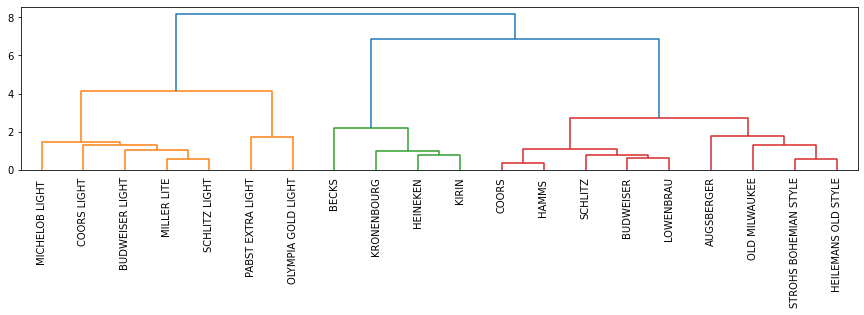

In [9]:
plt.figure(figsize=(15, 3))
sch.dendrogram(wlink, leaf_font_size=10, leaf_rotation=90, labels=beer.index)
plt.show()

In [10]:
wcluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
member = wcluster.fit_predict(zbeer)
member

array([0, 0, 0, 2, 2, 0, 0, 0, 3, 3, 0, 3, 3, 2, 2, 1, 0, 0, 1, 3],
      dtype=int64)

In [11]:
member1 = pd.DataFrame(member, columns=['cluster'], index=beer.index)
member1.head()

,cluster
name,
BUDWEISER,0
SCHLITZ,0
LOWENBRAU,0
KRONENBOURG,2
HEINEKEN,2


c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\clust

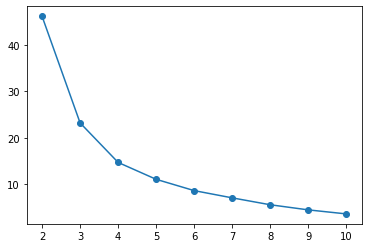

In [12]:
# kmeans를 위해서는 threadpoolctl를 > 3.0.0 이상으로 업데이트 필요 → 3.2.0버전 설치
inertia_list = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(zbeer)
    inertia_list.append(kmeans.inertia_)
plt.plot(range(2, 11), inertia_list, marker='o')